## Course Project

**Instructions:** <br>
a. In the course project, you will analyze a real-world dataset on data science jobs posted on the website Glassdoor. You will write a report on your data analysis using Jupyter Notebook. <br>
b. For each step, make sure to explain what you are doing, annotate your results, and provide your interpretation. <br>
c. When you finish, make sure to use `Kernel` -> `Restart and Run All` to restart the kernel and rerun the entire notebook to generate the desired outputs, before submitting your project report. <br>
d. Upload your .ipynb file to Canvas for grading. <br>
e. All questions related to the course project shall be posted in the Discussion section on Canvas. <br>
<br>

**Policy:** <br>
The course project is worth 25 points, counting towards 25% of the course final score. <br>

Late submission, empty submission or no submission receives 0 point. Please note that in order to pass the course, at least 30% of the total score for the project must be obtained. In case of special circumstances, email the instructor directly ahead of time.

### Data Science Job Salary Prediction
You can download the csv files from the project folder on Canvas.  <br>

#### Context
Data of data science job posts from the website glassdoor are collected. This project aims to predict whether the salary is high or not. First, you will create a categorical variable `high_salary` based on the average salary `avg_salary`: if `avg_salary >= 150`, `high_salary = 1`; if `avg_salary < 150`, `high_salary = 0`. This new variable `high_salary` will be the prediction outcome `Y`. Of course: you cannot use other columns related to salary such as min, max, range of salary for prediction. Min, max, range of salary cannot be used as `X`. (This is cheating!)  <br>

#### Variables:
Described in the data description file.

### Module 1: Data Exploration
Load `jobs_train.csv` and explore the dataset. How do the data look like? Are there any missing values? What do you do with missing values, i.e. removal, imputation, etc.?<br>
Are there any outliers? What do you do with outliers, i.e. drop them, explore the effects of outliers on models, etc.? <br>
Record your analysis procedures. For example, 20 observations are removed due to missingness, and 400 observations remain for further analysis. <br>

Hint: for removal of extreme outliers, consider: Q1=df.quantile(0.25); Q3=df.quantile(0.75); IQR=Q3-Q1; <br>
Remove samples that are smaller than Q1 - 2.5 * IQR or larger than Q3 + 2.5 * IQR. <br>
You don't have to remove outliers if there are not any. Provide justifications if you deem not necessary.

First of all, import libaries needed for module 1 and load jobs_train.csv

In [1]:
import numpy as np
import pandas as pd

df_train = pd.read_csv('jobs_train.csv')
df_train

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,...,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority
0,0,Data Scientist,105-167,"Location: Redmond, WA\nClient: Microsoft (Un-M...",0.0,Pactera Edge,"Redmond, WA",-1,-1,-1,...,-1,1,0,0,0,0,0,0,data scientist,na
1,1,Analytics - Business Assurance Data Analyst,124-198,Analytics - Business Assurance Data Analyst (C...,4.6,GreatAmerica Financial Services,"Cedar Rapids, IA","Cedar Rapids, IA",501 to 1000 employees,Company - Private,...,28,0,1,0,0,0,1,0,analyst,na
2,2,Data Scientist,91-150,Business Unit: Data Scientist Comcast brings t...,3.5,Comcast,"New York, NY","Philadelphia, PA",10000+ employees,Company - Public,...,57,1,0,0,0,1,1,0,data scientist,na
3,3,Principal Data Scientist,69-116,Job Requisition ID #\n20WD40121\nJob Title\nPr...,4.0,Autodesk,"San Francisco, CA","San Rafael, CA",5001 to 10000 employees,Company - Public,...,38,1,1,1,1,1,0,1,data scientist,senior
4,4,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,Private Practice / Firm,...,39,1,1,0,0,1,0,0,data scientist,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,525,AI Ops Data Scientist,92-155,"Company\n\nAstraZeneca is a global, innovation...",4.0,AstraZeneca,"Gaithersburg, MD","Cambridge, United Kingdom",10000+ employees,Company - Public,...,107,1,0,1,1,1,0,0,data scientist,na
526,526,Data Scientist,80-132,"Data Scientist (Fairfax, VA)\n\nDo you want to...",3.4,Trident Systems Inc,"Fairfax, VA","Fairfax, VA",51 to 200 employees,Company - Private,...,35,0,0,0,0,0,0,0,data scientist,na
527,527,"Vice President, Biometrics and Clinical Data M...",138-158,"At Alector, our mission is to develop therapie...",4.8,Alector,"South San Francisco, CA","South San Francisco, CA",51 to 200 employees,Company - Public,...,7,0,1,0,0,1,0,0,na,na
528,528,Data Scientist,92-155,Tokio Marine HCC is a leading specialty insura...,3.3,Tokio Marine HCC,"Houston, TX","Houston, TX",1001 to 5000 employees,Company - Private,...,46,1,0,0,0,0,0,0,data scientist,na


There are 5 values representing missing values in this dataset. The next step is to observe how many missing values are there in each variables.

In [2]:
print((df_train == 'na').sum())
print((df_train == -1).sum())
print((df_train == '-1').sum())
print((df_train == 'Unknown').sum())
print((df_train == 'Unknown / Non-Applicable').sum())

Unnamed: 0             0
Job Title              0
Salary Estimate        0
Job Description        0
Rating                 0
Company Name           0
Location               0
Headquarters           0
Size                   0
Type of ownership      0
Industry               0
Sector                 0
Revenue                0
min_salary             0
max_salary             0
avg_salary             0
job_state              0
same_state             0
company_age            0
python                 0
excel                  0
hadoop                 0
spark                  0
aws                    0
tableau                0
big_data               0
job_simp              54
seniority            458
dtype: int64
Unnamed: 0             0
Job Title              0
Salary Estimate        0
Job Description        0
Rating                 0
Company Name           0
Location               0
Headquarters           0
Size                   0
Type of ownership      0
Industry               0
Sector      

For missing values denoted as '-1' there are only a few of them so we can just drop them. For company_age there are too many missing values (101) so we are replacing them with the median of company_age. <br> <br>
For seniority, however, there are only 2 possible values 'senior' and 'na'. Therefore, we can represent this categorical variable as binary. If the value is 'senior', it is 1. If the value is missing ('na'), it is 0. <br> <br>
For Revenue, there are too many missing values (124), and intuitively it seems to be an important factor to predict if the salary is high or not. Therefore, we just leave them as they are and let the classification models decide by itself what to do with the missing values <br> <br>
For other missing values that take the value 'unknown' and '-1' we will just drop the rows with those missing values.

In [3]:
# For company_age there are too many missing values (101) so we are replacing them with the median of company_age
med = df_train[df_train['company_age'] != -1]['company_age'].median()
df_train['company_age'].replace(-1, med, inplace = True)


# For missing values denoted as '-1' there are only a few of them so we can just drop them
df_train = df_train[(df_train != 'Unknown') & (df_train != '-1')]
df_train = df_train.dropna()

#Drop job_simp = 'na'
df_train = df_train[df_train['job_simp'] != 'na']
df_train

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,...,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority
1,1,Analytics - Business Assurance Data Analyst,124-198,Analytics - Business Assurance Data Analyst (C...,4.6,GreatAmerica Financial Services,"Cedar Rapids, IA","Cedar Rapids, IA",501 to 1000 employees,Company - Private,...,28,0,1,0,0,0,1,0,analyst,na
3,3,Principal Data Scientist,69-116,Job Requisition ID #\n20WD40121\nJob Title\nPr...,4.0,Autodesk,"San Francisco, CA","San Rafael, CA",5001 to 10000 employees,Company - Public,...,38,1,1,1,1,1,0,1,data scientist,senior
4,4,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,Private Practice / Firm,...,39,1,1,0,0,1,0,0,data scientist,na
5,5,"Data Scientist, Kinship - NYC/Portland",92-155,Back to search results\nPrevious job\n\nNext j...,3.9,Mars,"New York, NY","Mc Lean, VA",10000+ employees,Company - Private,...,109,1,0,0,1,0,0,0,data scientist,na
6,6,Data Scientist,124-198,A strong candidate must demonstrate the abilit...,4.1,"Latitude, Inc.","Washington, DC","Hanover, MD",1 to 50 employees,Company - Private,...,21,1,0,0,0,0,1,0,data scientist,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,524,Data Scientist,124-198,Title: Data Scientist\n\nLocation: Springfield...,5.0,Royce Geospatial,"Springfield, VA","Arlington, VA",51 to 200 employees,Company - Private,...,6,1,0,0,0,0,0,1,data scientist,na
525,525,AI Ops Data Scientist,92-155,"Company\n\nAstraZeneca is a global, innovation...",4.0,AstraZeneca,"Gaithersburg, MD","Cambridge, United Kingdom",10000+ employees,Company - Public,...,107,1,0,1,1,1,0,0,data scientist,na
526,526,Data Scientist,80-132,"Data Scientist (Fairfax, VA)\n\nDo you want to...",3.4,Trident Systems Inc,"Fairfax, VA","Fairfax, VA",51 to 200 employees,Company - Private,...,35,0,0,0,0,0,0,0,data scientist,na
528,528,Data Scientist,92-155,Tokio Marine HCC is a leading specialty insura...,3.3,Tokio Marine HCC,"Houston, TX","Houston, TX",1001 to 5000 employees,Company - Private,...,46,1,0,0,0,0,0,0,data scientist,na


112 observations are removed due to missingness, and 418 observations remain for further analysis

After dealing with missing values, we remove extreme values using \[Q1 - 2.5(Q3 - Q1), Q3 + 2.5(Q3 - Q1)]

In [4]:
# Remove extreme values
removeExtremeColList = ['Rating', 'company_age', 'avg_salary']
for colName in removeExtremeColList:
    Q1 = df_train[colName].quantile(0.25)
    Q3 = df_train[colName].quantile(0.75)
    upperbound = Q3 + 2.5 * (Q3 - Q1)
    lowerbound = Q1 - 2.5 * (Q3 - Q1)
    df_train = df_train[(df_train[colName] > lowerbound) & (df_train[colName] < upperbound)]
df_train

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,...,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority
1,1,Analytics - Business Assurance Data Analyst,124-198,Analytics - Business Assurance Data Analyst (C...,4.6,GreatAmerica Financial Services,"Cedar Rapids, IA","Cedar Rapids, IA",501 to 1000 employees,Company - Private,...,28,0,1,0,0,0,1,0,analyst,na
3,3,Principal Data Scientist,69-116,Job Requisition ID #\n20WD40121\nJob Title\nPr...,4.0,Autodesk,"San Francisco, CA","San Rafael, CA",5001 to 10000 employees,Company - Public,...,38,1,1,1,1,1,0,1,data scientist,senior
4,4,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,Private Practice / Firm,...,39,1,1,0,0,1,0,0,data scientist,na
6,6,Data Scientist,124-198,A strong candidate must demonstrate the abilit...,4.1,"Latitude, Inc.","Washington, DC","Hanover, MD",1 to 50 employees,Company - Private,...,21,1,0,0,0,0,1,0,data scientist,na
7,7,Software Engineer - Machine Learning & Data Sc...,128-201,Please note that visa sponsorship is not avail...,4.7,New Relic,"Portland, OR","San Francisco, CA",1001 to 5000 employees,Company - Public,...,12,1,0,0,0,0,0,0,mle,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,519,Analytics - Business Assurance Data Analyst,56-97,Analytics - Business Assurance Data Analyst (C...,4.6,GreatAmerica Financial Services,"Cedar Rapids, IA","Cedar Rapids, IA",501 to 1000 employees,Company - Private,...,28,0,1,0,0,0,1,0,analyst,na
521,521,"Machine Learning Engineer, Sr.",138-158,"Machine Learning Engineer, Sr.\nLocation\n\n\n...",4.2,AeroVironment,"Simi Valley, CA","Simi Valley, CA",501 to 1000 employees,Company - Public,...,49,1,1,0,0,1,0,1,mle,senior
524,524,Data Scientist,124-198,Title: Data Scientist\n\nLocation: Springfield...,5.0,Royce Geospatial,"Springfield, VA","Arlington, VA",51 to 200 employees,Company - Private,...,6,1,0,0,0,0,0,1,data scientist,na
526,526,Data Scientist,80-132,"Data Scientist (Fairfax, VA)\n\nDo you want to...",3.4,Trident Systems Inc,"Fairfax, VA","Fairfax, VA",51 to 200 employees,Company - Private,...,35,0,0,0,0,0,0,0,data scientist,na


52 values are removed because they are extreme outliers. 366 observations are left for furthur analysis.

We then create new column high_salary, which is the prediction goal of the project

In [5]:
# Create new column named high_salary
df_train['high_salary'] = np.where(df_train['avg_salary'] >= 150, 1, 0)
df_train

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,...,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority,high_salary
1,1,Analytics - Business Assurance Data Analyst,124-198,Analytics - Business Assurance Data Analyst (C...,4.6,GreatAmerica Financial Services,"Cedar Rapids, IA","Cedar Rapids, IA",501 to 1000 employees,Company - Private,...,0,1,0,0,0,1,0,analyst,na,1
3,3,Principal Data Scientist,69-116,Job Requisition ID #\n20WD40121\nJob Title\nPr...,4.0,Autodesk,"San Francisco, CA","San Rafael, CA",5001 to 10000 employees,Company - Public,...,1,1,1,1,1,0,1,data scientist,senior,0
4,4,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,Private Practice / Firm,...,1,1,0,0,1,0,0,data scientist,na,1
6,6,Data Scientist,124-198,A strong candidate must demonstrate the abilit...,4.1,"Latitude, Inc.","Washington, DC","Hanover, MD",1 to 50 employees,Company - Private,...,1,0,0,0,0,1,0,data scientist,na,1
7,7,Software Engineer - Machine Learning & Data Sc...,128-201,Please note that visa sponsorship is not avail...,4.7,New Relic,"Portland, OR","San Francisco, CA",1001 to 5000 employees,Company - Public,...,1,0,0,0,0,0,0,mle,na,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,519,Analytics - Business Assurance Data Analyst,56-97,Analytics - Business Assurance Data Analyst (C...,4.6,GreatAmerica Financial Services,"Cedar Rapids, IA","Cedar Rapids, IA",501 to 1000 employees,Company - Private,...,0,1,0,0,0,1,0,analyst,na,0
521,521,"Machine Learning Engineer, Sr.",138-158,"Machine Learning Engineer, Sr.\nLocation\n\n\n...",4.2,AeroVironment,"Simi Valley, CA","Simi Valley, CA",501 to 1000 employees,Company - Public,...,1,1,0,0,1,0,1,mle,senior,0
524,524,Data Scientist,124-198,Title: Data Scientist\n\nLocation: Springfield...,5.0,Royce Geospatial,"Springfield, VA","Arlington, VA",51 to 200 employees,Company - Private,...,1,0,0,0,0,0,1,data scientist,na,1
526,526,Data Scientist,80-132,"Data Scientist (Fairfax, VA)\n\nDo you want to...",3.4,Trident Systems Inc,"Fairfax, VA","Fairfax, VA",51 to 200 employees,Company - Private,...,0,0,0,0,0,0,0,data scientist,na,0


Since there are 2 possible values for prediction outcome(high_salary) namely 0 and 1, the next step is to know if the data set is balanced or not by printing the number of observations with 0 as the value of high_salary and the number of observations with 1 as the value of high_salary.

In [6]:
df_train['high_salary'].value_counts()

0    303
1     63
Name: high_salary, dtype: int64

The data set is significantly imbalanced. Therefore, some techniques such as oversampling should be applied to deal with the imbalanceness.

### Module 2: Data Visualization
What are the distributions of variables? Are the variables distributed differently in the high-salary group versus the low-salary group? Use tables and/or figures to visualize your exploration and findings. Present no more than 5 figures/tables that you think are important. For variables with similar patterns, you may state in your findings that variables a, b, c have similar patterns.

Import libaries needed for data visualization

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

The first visualization used is correlation heatmap

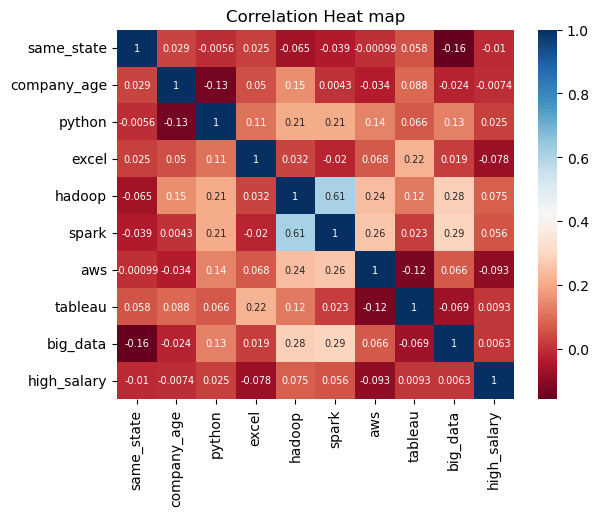

In [8]:
dropList = ['Unnamed: 0', 'Rating', 'min_salary', 'max_salary', 'avg_salary']
df_copy = df_train.drop(dropList, axis = 1)
corr = df_copy.corr()
sns.heatmap(corr, annot=True, annot_kws={'size': 7}, cmap='RdBu')
plt.title('Correlation Heat map')
plt.show()

From the correlation heatmap above, we conclude that for most variables, the correlations between them are insignificant. The only pair of variables with correlation large enough to be considered significant is spark and hadoop. However, the correlation of 0.61 is still not big enough for us to consider directly dropping one of these 2 variables (spark and hadoop).

Next, KDE plot is used to visualize how rating is distributed differently based on high_salary. <br> In this plot, common_norm is set to be false. In other words, the areas under both curves are equal. 

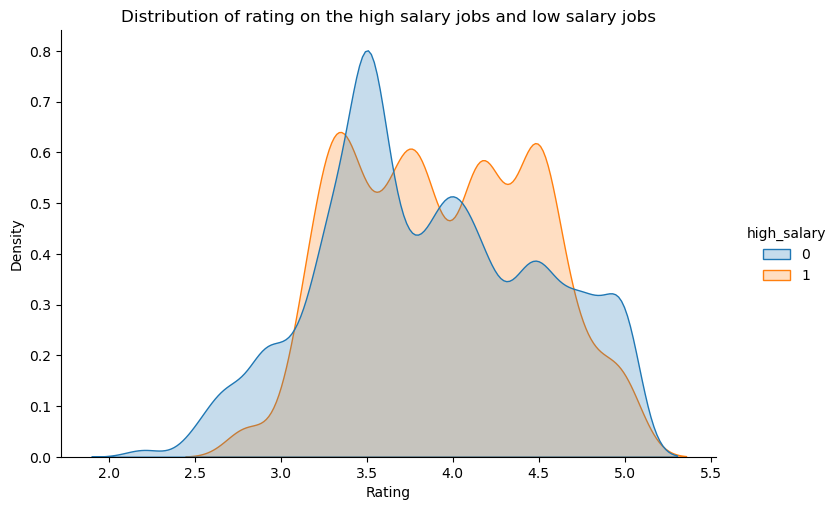

In [9]:
sns.displot(df_train, x = 'Rating', hue = 'high_salary', height = 5, fill = True, aspect = 1.5, kind = 'kde', common_norm=False, bw_adjust=.5)
plt.title('Distribution of rating on the high salary jobs and low salary jobs')
plt.show()

If the dataset is balanced, when the rating is between 3.7 and 4.7 or between 3.1 and 3.4, salary is slightly more likely to be high. If the rating is not in these 2 intervals, the salary is generally more likely to be low.

Then, box plot below is used to visualize the relationship between job type (job_simp), average salary (avg_salary), and seniority.

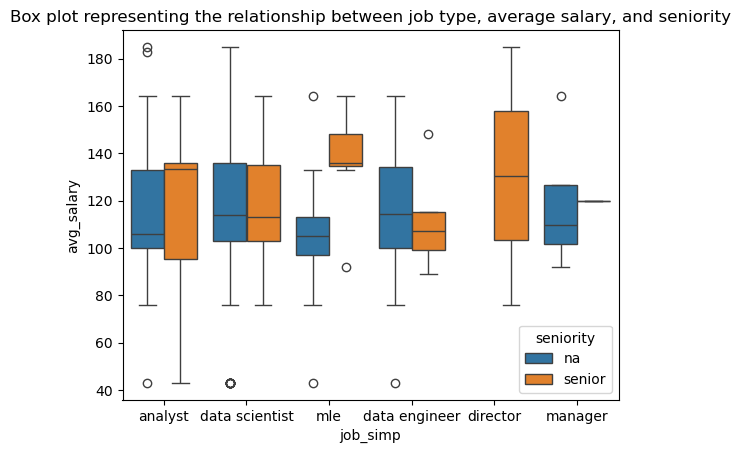

In [10]:
sns.boxplot(data=df_train, x='job_simp', y='avg_salary', hue = 'seniority')
plt.title('Box plot representing the relationship between job type, average salary, and seniority')
plt.show()

Overall, seniority does not have significant effect on average salary except for mle, which we can clearly see that the jobs that require senior have dramatically higher average salary. <br>

Next, bar plot is used to visualize the relationship between company age, the number of skills required, and high_salary (prediction goal of the project).

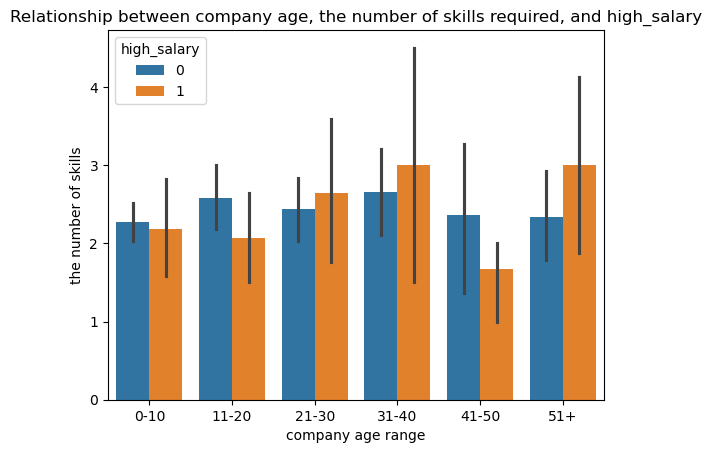

In [11]:
skills = df_train.loc[:, 'python':'big_data'].T.sum()
df_copy = df_train.copy()
df_copy['the number of skills'] = skills
df_copy['company age range'] = np.where(df_copy['company_age'] <= 10, '0-10',
                                        np.where(df_copy['company_age'] <= 20, '11-20',
                                       np.where(df_copy['company_age'] <= 30, '21-30',
                                       np.where(df_copy['company_age'] <= 40, '31-40',
                                        np.where(df_copy['company_age'] <= 50, '41-50','51+'     
                                       )))))
df_copy = df_copy.sort_values(by='company_age')
sns.barplot(data=df_copy, x='company age range', y='the number of skills', hue='high_salary')
plt.title('Relationship between company age, the number of skills required, and high_salary')
plt.show()

From bar chart above, we can observe that, for the low salary jobs, the average number of skills stay relatively the same regardless of company's age. <br>
On the other hand, for the high salary jobs, the number of skills required in companies with different age range vary in comparison. <br>
Specifically, for the high salary jobs, on average, older companies seem to require more skills. The only exception is companies which has the age within the age range of 41-50. Unexpectedly, those companies require lower number of skills.

The last visualization is a horizontal bar chart visualizing revenue, average salary, and whether the job is at the same state as head quarter (1 represent yes, 0 represent no).

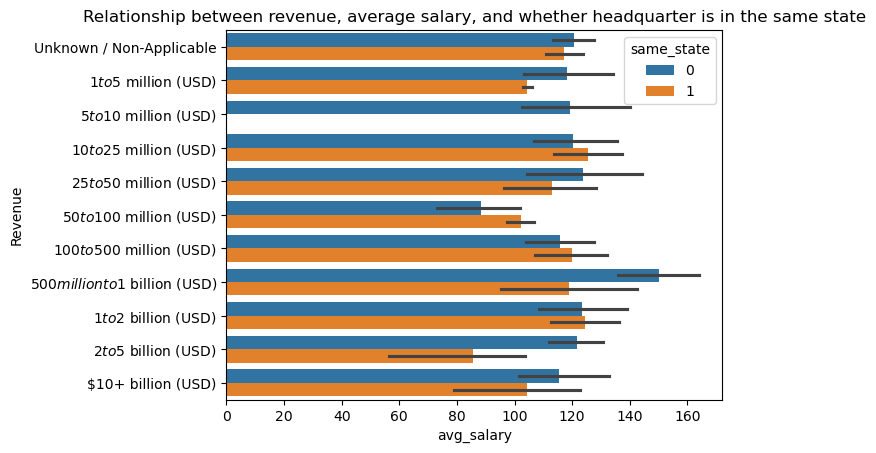

In [12]:
RevenueOrderList = ['Unknown / Non-Applicable', '$1 to $5 million (USD)', '$5 to $10 million (USD)',
                    '$10 to $25 million (USD)', '$25 to $50 million (USD)', '$50 to $100 million (USD)', 
                    '$100 to $500 million (USD)', '$500 million to $1 billion (USD)',
                    '$1 to $2 billion (USD)', '$2 to $5 billion (USD)', '$10+ billion (USD)']
sns.barplot(data=df_train, x='avg_salary', y='Revenue', orient = 'h', order = RevenueOrderList, hue = 'same_state')
plt.title('Relationship between revenue, average salary, and whether headquarter is in the same state')
plt.show()

For the companies with revenues within the range of 500 million to 1 billion and 2 to 5 bllion USD, the jobs in the different state from the headquarter get higher average salary than jobs in the same state. <br> <br>
On average, companies that have 500 million to 1 billion USD revenue and the headquater at the different state give the highest average salaries.

### Module 3: Dimension Reduction
Apply unsupervised learning methods to achieve dimension reduction. Visualize and interpret the results. Any dimension reduction algorithms can be used.

Drop the columns that seem to be useless and salary related variables. <br>Split the training set into X(df_train_x) and y(df_train_y).

In [13]:
# Drop the columns that seem to be useless, salary related variables and Unnamed for df x
dropList = ['Job Description', 'Company Name', 'Location', 'Headquarters', 'Unnamed: 0',
            'Salary Estimate', 'min_salary', 'max_salary', 'avg_salary', 'high_salary', 'Job Title']
df_train_y = df_train['high_salary']
df_train_y = df_train_y.reset_index(drop=True)
df_train_x = df_train.drop(dropList, axis = 1)
df_train_x.columns

Index(['Rating', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'job_state', 'same_state', 'company_age', 'python', 'excel', 'hadoop',
       'spark', 'aws', 'tableau', 'big_data', 'job_simp', 'seniority'],
      dtype='object')

Since seniority column has 2 possible values namely 'senior' and 'na' (missing), we replace 'senior' by 1 and 'na' by 0.<br>
Then, replace categorical variables that appear rarely with 'others'.

In [14]:
cateList = ['Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'job_state', 'job_simp']
df_train_x['seniority'] = np.where(df_train_x['seniority'] == 'senior', 1, 0)
#Replace categorical variables that appear rarely with 'others'
CommonDict = {}
for cateVar in cateList:
    CommonDict[cateVar] = []
    countSeries = df_train_x[cateVar].value_counts()
    for index, count in countSeries.iteritems():
        if count > 3:
            CommonDict[cateVar].append(index)
for cateVar in cateList:
    df_train_x[cateVar] = np.where(~df_train_x[cateVar].isin(CommonDict[cateVar]), 'other', df_train_x[cateVar])
df_train_x

,Rating,Size,Type of ownership,Industry,Sector,Revenue,job_state,same_state,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority
1,4.6,501 to 1000 employees,Company - Private,Lending,Finance,$100 to $500 million (USD),other,1,28,0,1,0,0,0,1,0,analyst,0
3,4.0,5001 to 10000 employees,Company - Public,Computer Hardware & Software,Information Technology,$2 to $5 billion (USD),CA,0,38,1,1,1,1,1,0,1,data scientist,1
4,3.8,1001 to 5000 employees,other,Consulting,Business Services,$100 to $500 million (USD),MA,1,39,1,1,0,0,1,0,0,data scientist,0
6,4.1,1 to 50 employees,Company - Private,Consulting,Business Services,$1 to $5 million (USD),DC,0,21,1,0,0,0,0,1,0,data scientist,0
7,4.7,1001 to 5000 employees,Company - Public,Computer Hardware & Software,Information Technology,$100 to $500 million (USD),other,0,12,1,0,0,0,0,0,0,mle,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,4.6,501 to 1000 employees,Company - Private,Lending,Finance,$100 to $500 million (USD),other,1,28,0,1,0,0,0,1,0,analyst,0
521,4.2,501 to 1000 employees,Company - Public,Aerospace & Defense,Aerospace & Defense,$100 to $500 million (USD),CA,1,49,1,1,0,0,1,0,1,mle,1
524,5.0,51 to 200 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$10 to $25 million (USD),VA,0,6,1,0,0,0,0,0,1,data scientist,0
526,3.4,51 to 200 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$25 to $50 million (USD),VA,1,35,0,0,0,0,0,0,0,data scientist,0


Use dummy variables to represent categorical variables and sort the columns

In [15]:
#Use dummy variables to represent categorical variables
df_train_x = pd.get_dummies(df_train_x, columns = cateList)

#Sort the columns
df_train_x = df_train_x.reindex(sorted(df_train_x.columns), axis=1)
df_train_x

,Industry_Advertising & Marketing,Industry_Aerospace & Defense,Industry_Banks & Credit Unions,Industry_Biotech & Pharmaceuticals,Industry_Computer Hardware & Software,Industry_Consulting,Industry_Enterprise Software & Network Solutions,Industry_Federal Agencies,Industry_Health Care Services & Hospitals,Industry_IT Services,...,job_state_ TX,job_state_ VA,job_state_ WA,job_state_US,job_state_other,python,same_state,seniority,spark,tableau
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
6,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
7,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
521,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
524,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
526,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


Use PCA to reduce the dimension. Before using PCA, we need to standardize the data using Sklearn's StandardScaler first.

In [16]:
#Standardize the data first
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scalar = StandardScaler()
scalar.fit(df_train_x)
scaled_train_x = scalar.transform(df_train_x)

#Use PCA to reduce dimension
pca = PCA(n_components = 92)
pca.fit(scaled_train_x)
eigenvalues = pca.explained_variance_

Plot screeplot with y being eigenvalues and x being the number of variables (components)

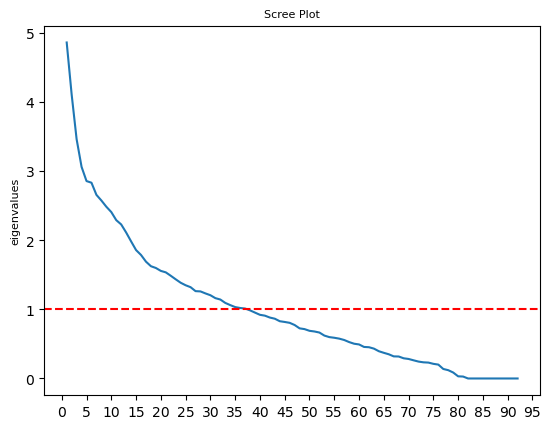

In [17]:
PC_numbers = np.arange(pca.n_components_) + 1
plt.plot(PC_numbers, eigenvalues)
plt.title('Scree Plot', fontsize=8)
plt.ylabel('eigenvalues', fontsize=8)
plt.axhline(y=1, color='r', linestyle='--')
plt.xticks(np.arange(0, 100, 5))
plt.show()

From the graph above, by kaiser rule, we use the first 35 variables with highest eigenvalues because their eigenvalues >= 1.

In [18]:
# By elbow rule, we use 30 variables
pca = PCA(n_components = 35)
pca.fit(scaled_train_x)
x_train = pca.transform(scaled_train_x)
x_train.shape

(366, 35)

Visualize the result of PCA dimension reduction. <br>
The graph is a 2d scatterplot with the x-axis being the first principal component and y-axis being the second principal component. <br>

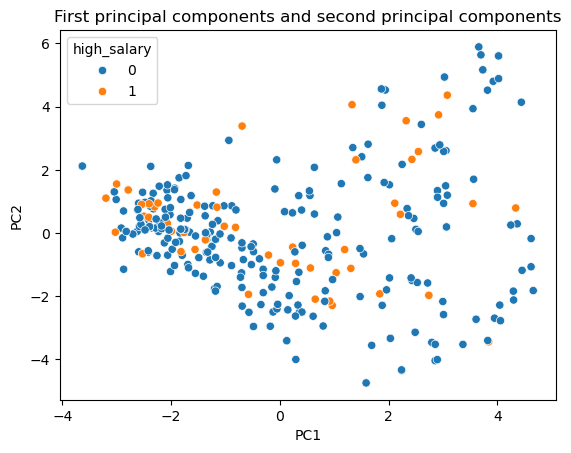

In [19]:
# Visualize the result of PCA dimension reduction
pcaDf = pd.DataFrame(x_train)
pcaDf = pd.concat([pcaDf, df_train_y], axis = 1, ignore_index = True)
pcaDf = pcaDf.rename(columns = lambda x: x + 1)
pcaDf = pcaDf.add_prefix('PC')
pcaDf = pcaDf.rename(columns = {'PC36': 'high_salary'})

# 2D plot
sns.scatterplot(data=pcaDf, x='PC1', y='PC2', hue = 'high_salary')
plt.title('First principal components and second principal components')
plt.show()

### Module 4: Classification and Prediction
Choose three classification methods and build classification models based on data from `jobs_train.csv`, using five-fold cross-validation. <br>

Further, load `jobs_test.csv` and use it as the test dataset to evaluate your models and compare their performance. Consider visualizing the results, and evaluate the results using metrics such as the confusion matrix. Which observations have the worst prediction and what are their characteristics? <br>

Note: we don't deduct points based on accuracy, as long as the models can be fitted correctly and the results are reasonable. However, if the model is wrong and does not yield meaningful and interpretable results, or if the results are interpreted incorrectly and wrong conclusions are drawn, points will be deducted.  

3 classification methods chosen are support vector machine with linear kernel, randomforest, and gaussian naive bayes classifier

First of all create y_train series, import all libaries neccessary for this module, and fix the numpy's seed.

In [20]:
y_train = pcaDf['high_salary']
# Libaries
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import resample
# Fix the seed
np.random.seed(555)

The first model is Support vector machine. <br>
Perform 5-fold cross validation on the SVM model to find the most suitable hyperparameter.

In [21]:
# First model: SVM
C_list = [0.01, 0.05, 0.1, 0.3, 1, 5, 10, 40, 100]
svms = []
for c in C_list:
    svms.append(SVC(kernel = 'linear', C = c))
SVMaccList = []
for svm in svms:
    SVMaccList.append(cross_val_score(svm, x_train, y_train, cv=5, scoring='accuracy')) 

for i, acc in enumerate(SVMaccList):
    print(f'Average 5-fold cross-validation accuracy for svm{i} (C = {C_list[i]}): {acc.mean()}')

Average 5-fold cross-validation accuracy for svm0 (C = 0.01): 0.8278785634950019
Average 5-fold cross-validation accuracy for svm1 (C = 0.05): 0.8278785634950019
Average 5-fold cross-validation accuracy for svm2 (C = 0.1): 0.8278785634950019
Average 5-fold cross-validation accuracy for svm3 (C = 0.3): 0.8278785634950019
Average 5-fold cross-validation accuracy for svm4 (C = 1): 0.8278785634950019
Average 5-fold cross-validation accuracy for svm5 (C = 5): 0.8278785634950019
Average 5-fold cross-validation accuracy for svm6 (C = 10): 0.8278785634950019
Average 5-fold cross-validation accuracy for svm7 (C = 40): 0.8278785634950019
Average 5-fold cross-validation accuracy for svm8 (C = 100): 0.8278785634950019


After implementing 5-fold cross validation on SVM models, we observe that no matter how much we change the values C the cross-validation accuracy will be either 0.8279. This may be the result of imbalanced dataset making the SVM predict always or almost always predict 0, which occurs significantly more frequently than 1. Confusion matrix at the end of this module will show that this reasoning is indeed true. Oversampled dataset can be used to tackle this issue.

The second model is random forest classifier. <br>
Just like the first model, we perform 5-fold cross validation on the SVM model to find the most suitable hyperparameter.

In [22]:
# Second model: Random Forest
nEstimatorsList = [10, 30, 50, 70, 100, 150, 200]
rfs = []
for nestimators in nEstimatorsList:
    rfs.append(RandomForestClassifier(n_estimators=nestimators, random_state=555))
rfaccs = []
for i, model in enumerate(rfs):
    rfaccs.append(cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy'))
    print(f'Average 5-fold cross-validation accuracy for rf{i} (n_estimators = \
{nEstimatorsList[i]}) is {rfaccs[i].mean()}')

Average 5-fold cross-validation accuracy for rf0 (n_estimators = 10) is 0.781414291003332
Average 5-fold cross-validation accuracy for rf1 (n_estimators = 30) is 0.7841540170307294
Average 5-fold cross-validation accuracy for rf2 (n_estimators = 50) is 0.7950758978156239
Average 5-fold cross-validation accuracy for rf3 (n_estimators = 70) is 0.7841540170307294
Average 5-fold cross-validation accuracy for rf4 (n_estimators = 100) is 0.7896334690855239
Average 5-fold cross-validation accuracy for rf5 (n_estimators = 150) is 0.7923731951129211
Average 5-fold cross-validation accuracy for rf6 (n_estimators = 200) is 0.7923731951129211


We choose rf2 (the model with n_estimators = 50) since it has the highest accuracy mean on 5-fold cross validation.

The third model is gaussian naive bayes classifier. <br>
Even though this model does not have any hyperparameters to fine-tune, we still perform 5-fold cross validation to get the 5-fold cross validation accuracy mean of this model.

In [23]:
# Third model: gaussian naive bayes classifier
gnb = GaussianNB()
gnb_cv_acc = cross_val_score(gnb, x_train, y_train, cv=5, scoring='accuracy')
gnb_cv_acc.mean()

0.751203258052573

Since imbalanced training set seems to be a significant problem, oversampling technique is used on the training dataset before training new SVM, random forest, and gaussian naive baye classifier models and comparing the result with the ones without oversampling.

In [24]:
# Deal with imbalanced data by over-sampling
highsalary_df = pcaDf[pcaDf['high_salary'] == 1]
lowsalary_df = pcaDf[pcaDf['high_salary'] == 0]
highsalary_df = resample(highsalary_df, replace=True, n_samples=len(lowsalary_df))
df_oversampled = pd.concat([lowsalary_df, highsalary_df])
x_train_oversampled = df_oversampled.drop('high_salary', axis = 1).to_numpy()
y_train_oversampled = df_oversampled['high_salary']
df_oversampled

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,high_salary
1,1.868531,4.561172,1.717693,1.141726,-2.496913,2.313729,1.233259,-0.353733,0.078345,1.558974,...,-0.288608,0.060708,-0.267046,0.711511,0.254696,-0.474678,-0.885224,0.028249,-1.111006,0
6,1.919620,1.599838,2.035216,2.129987,-2.300620,2.086064,1.066274,3.653988,2.993209,1.664026,...,0.279727,-0.754759,0.267156,-1.207935,-0.595800,1.045354,-0.942807,-0.005159,-0.918647,0
7,-1.659837,0.031595,-0.829388,1.530430,0.805164,0.187498,1.209201,0.924186,1.253339,3.512210,...,-0.621094,-0.408843,-0.017571,-1.099357,0.076661,0.172374,-0.362236,-1.363815,0.587989,0
8,2.795402,-3.458302,-0.839818,0.450504,-2.621872,-1.436109,-1.599500,-1.122704,-0.568189,0.178923,...,0.915082,0.261866,0.361429,0.153268,-2.184582,0.802405,1.299341,-0.865855,-0.847187,0
9,0.294575,-3.998769,0.111556,3.470780,-0.529557,-2.775416,-0.593428,-2.216089,-1.517171,0.359924,...,1.257309,0.726950,1.132706,-1.355625,1.474255,2.280230,-0.871062,0.549215,-1.091680,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,1.035762,-1.254439,0.693213,-1.325984,2.487108,4.150641,-3.088487,2.815462,-1.098752,1.877588,...,-0.380499,-0.432837,-0.054054,-0.164997,-0.656824,-2.229390,-2.346855,-2.013783,0.225305,1
231,-2.404648,0.926021,-0.150627,0.524391,-0.735064,0.471546,0.937066,0.113032,1.559898,0.788090,...,1.135089,0.807407,1.200570,0.241065,1.271036,0.915661,-0.815117,1.201620,-0.608497,1
174,-2.526381,-0.654348,0.817819,0.068424,-0.139928,0.100951,-0.202136,-0.634589,1.058117,-0.036062,...,0.914187,0.469539,-0.793579,-0.992418,0.668950,0.465153,-0.200785,0.741119,-0.439016,1
125,-2.411196,0.501216,-0.022432,0.082240,-0.604279,-0.203342,-1.679468,-0.044337,-1.078439,-1.639130,...,-1.314543,0.363788,-0.256949,-0.116297,-0.119900,-0.002350,2.488710,0.508590,-0.734966,1


Perform 5-fold validation on support vector machine using oversampled training set to get the optimal hyperparameter.

In [25]:
# First model: SVM on oversampled dataset
C_list_ovsamp = [0.01, 0.03, 0.05, 0.1, 0.3, 1, 10, 30, 100]
svms_ovsamp = []
for c in C_list_ovsamp:
    svms_ovsamp.append(SVC(kernel = 'linear', C = c, random_state = 555))
SVMaccList_ovsamp = []
for i, svm in enumerate(svms_ovsamp):
    SVMaccList_ovsamp.append(cross_val_score(svm, x_train_oversampled, y_train_oversampled, cv=5, scoring='accuracy')) 
    print(f'Average 5-fold cross-validation accuracy for svm{i} (C = {C_list_ovsamp[i]}) is {SVMaccList_ovsamp[i].mean()}')

Average 5-fold cross-validation accuracy for svm0 (C = 0.01) is 0.6484487196856794
Average 5-fold cross-validation accuracy for svm1 (C = 0.03) is 0.648435171385991
Average 5-fold cross-validation accuracy for svm2 (C = 0.05) is 0.6533532041728762
Average 5-fold cross-validation accuracy for svm3 (C = 0.1) is 0.6517003116108928
Average 5-fold cross-validation accuracy for svm4 (C = 0.3) is 0.659991871020187
Average 5-fold cross-validation accuracy for svm5 (C = 1) is 0.648435171385991
Average 5-fold cross-validation accuracy for svm6 (C = 10) is 0.6583254301585151
Average 5-fold cross-validation accuracy for svm7 (C = 30) is 0.6583254301585151
Average 5-fold cross-validation accuracy for svm8 (C = 100) is 0.6583254301585151


SVM4 (c = 0.3) seems to have the highest average 5-fold cross-validation accuracy after using the oversampled training set.

Perform 5-fold validation on random forest classifier using oversampled dataset to get the optimal hyperparameter.

In [26]:
# Second model: Random Forest on oversampled data
nEstimatorsList_ovsamp = [10, 20, 30, 40, 50, 60, 80, 100]
rfs_ovsamp = []
for nestimators in nEstimatorsList_ovsamp:
    rfs_ovsamp.append(RandomForestClassifier(n_estimators=nestimators, random_state = 555))
rfaccs_ovsamp = []
for i, model in enumerate(rfs_ovsamp):
    rfaccs_ovsamp.append(cross_val_score(model, x_train_oversampled, y_train_oversampled, cv=5, scoring='accuracy'))
    print(f'Average 5-fold cross-validation accuracy for rf{i} (n_estimators = \
{nEstimatorsList_ovsamp[i]}) with oversampling is {rfaccs_ovsamp[i].mean()}')

Average 5-fold cross-validation accuracy for rf0 (n_estimators = 10) with oversampling is 0.9372849207424467
Average 5-fold cross-validation accuracy for rf1 (n_estimators = 20) with oversampling is 0.9339791356184799
Average 5-fold cross-validation accuracy for rf2 (n_estimators = 30) with oversampling is 0.9356320281804635
Average 5-fold cross-validation accuracy for rf3 (n_estimators = 40) with oversampling is 0.9339926839181683
Average 5-fold cross-validation accuracy for rf4 (n_estimators = 50) with oversampling is 0.9389513616041187
Average 5-fold cross-validation accuracy for rf5 (n_estimators = 60) with oversampling is 0.9372984690421353
Average 5-fold cross-validation accuracy for rf6 (n_estimators = 80) with oversampling is 0.937284920742447
Average 5-fold cross-validation accuracy for rf7 (n_estimators = 100) with oversampling is 0.937284920742447


rf4 (n_estimators = 50) seems to have the highest average 5-fold cross-validation accuracy after using the oversampled training set.

Perform 5-fold validation on gaussian naive bayes classifier using oversampled dataset.

In [27]:
# Third model: gaussian naive bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb_ovsamp = GaussianNB()
gnb_cv_acc = cross_val_score(gnb, x_train_oversampled, y_train_oversampled, cv=5, scoring='accuracy')
gnb_cv_acc.mean()

0.6055818994716164

Preparing the testing set <br>
1. Load the testing set <br>
2. Handle missing values <br> 
3. drop some columns, use dummy variables for categorical variables, and assign seniority as 1 and 0 <br>
4. Make the columns of testing set the same as train set <br>
5. Drop features that are in testing set but unseen in training set <br>
6. sort the column to make the order of column of testing set the same as training set <br>
7. use the pca trained on the training set to transform the test set <br>

In [28]:
# Load the test set
df_test = pd.read_csv('jobs_test.csv')
df_test['high_salary'] = np.where(df_test['avg_salary'] >= 150, 1, 0)

# Handle missing values
# For company_age there are too many missing values (101) so we are replacing them with the median of company_age
med = df_test[df_test['company_age'] != -1]['company_age'].median()
df_test['company_age'].replace(-1, med, inplace = True)
# For missing values denoted as '-1' there are only a few of them so we can just drop them
df_test = df_test[(df_test != 'Unknown') & (df_test != '-1')]
df_test = df_test.dropna()
#Drop job_simp = 'na'
df_test = df_test[df_test['job_simp'] != 'na']
df_test

# drop some columns, use dummy variables for categorical variables, and assign seniority as 1 and 0
df_test_x = df_test.drop(dropList, axis = 1)
for cateVar in cateList:
    df_test_x[cateVar] = np.where(~df_test_x[cateVar].isin(CommonDict[cateVar]), 'other', df_test_x[cateVar])
df_test_x = pd.get_dummies(df_test_x, columns = cateList)
df_test_x['seniority'] = np.where(df_test_x['seniority'] == 'senior', 1, 0)

#Some columns of train set may not be in test set. Make the columns of test set the same as train set
for col in df_train_x.columns.difference(df_test_x.columns):
    df_test_x[col] = 0
    
#Drop features that are in test set but unseen in train set
coltestdropList = df_test_x.columns.difference(df_train_x.columns)
df_test_x = df_test_x.drop(coltestdropList, axis = 1)

# sort the column
df_test_x = df_test_x.reindex(sorted(df_test_x.columns), axis=1)

# use the pca on the test set
x_test = scalar.transform(df_test_x)
x_test = pca.transform(x_test)

y_test = df_test['high_salary']

Choose models with the hyperparameters that give the highest average accuracy score on 5 fold cross validation. Train the first 3 models with the entire training set without oversampling. Then, train the other 3 models with the entire oversampled training set.

In [29]:
# choose models with the right hyperparameters to predict test set
svmModel = svms[2]
rfModel = rfs[2]
gnbModel = gnb
svmOvsamp = svms_ovsamp[4]
rfOvsamp = rfs_ovsamp[4]
gnbOvsamp = gnb_ovsamp

# Train these 3 models with the entire train set
svmModel.fit(x_train, y_train)
rfModel.fit(x_train, y_train)
gnbModel.fit(x_train, y_train)

# Train these 3 models with the entire oversampled train set
svmOvsamp.fit(x_train_oversampled, y_train_oversampled)
rfOvsamp.fit(x_train_oversampled, y_train_oversampled)
gnbOvsamp.fit(x_train_oversampled, y_train_oversampled);

There are now 6 models. <br>
The first two models are support vector machine. <br>
The next two are random forest classifier. <br>
The last two are gaussian naive baye classifier. <br>
The 1st, 3rd, and 5th models are trained with train set that does not use oversampling technique, while the resst are trained with oversampled train set. <br> <br>
the next step is to predict the test set with these models and print out the accuracy scores

In [30]:
# Predict the test set and print accuracies
predicts = []
final_models = {'svm without oversampling': svmModel, 'svm with oversampling': svmOvsamp,
                'rf without oversampling': rfModel, 'rf with oversampling': rfOvsamp,
                'gnb without oversampling': gnbModel, 'gnb with oversampling': gnbOvsamp}
originals = ['svm without oversampling', 'rf without oversampling', 'gnb without oversampling']
oversamplings = ['svm with oversampling', 'rf with oversampling', 'gnb with oversampling']
for name, model in final_models.items():
    # Non-oversampling models
    if name in originals:
        predicts.append((name, model.predict(x_train), model.predict(x_test)))
    # Oversampling models
    elif name in oversamplings:
        predicts.append((name, model.predict(x_train_oversampled), model.predict(x_test)))
    
# Print the accuracy scores
for i in range(6):
    model_name = predicts[i][0]
    train_acc = 0
    # Non-oversampling models
    if predicts[i][0] in originals:
        train_acc = accuracy_score(y_train, predicts[i][1])
    # Oversampling models
    elif predicts[i][0] in oversamplings:
        train_acc = accuracy_score(y_train_oversampled, predicts[i][1])
    test_acc = accuracy_score(y_test, predicts[i][2])
    print(f'The training set accuracy of {model_name} is {train_acc}')
    print(f'The testing set accuracy of {model_name} is {test_acc}')

The training set accuracy of svm without oversampling is 0.8278688524590164
The testing set accuracy of svm without oversampling is 0.7745098039215687
The training set accuracy of svm with oversampling is 0.735973597359736
The testing set accuracy of svm with oversampling is 0.5686274509803921
The training set accuracy of rf without oversampling is 0.9590163934426229
The testing set accuracy of rf without oversampling is 0.7352941176470589
The training set accuracy of rf with oversampling is 0.9752475247524752
The testing set accuracy of rf with oversampling is 0.7058823529411765
The training set accuracy of gnb without oversampling is 0.8224043715846995
The testing set accuracy of gnb without oversampling is 0.7352941176470589
The training set accuracy of gnb with oversampling is 0.6782178217821783
The testing set accuracy of gnb with oversampling is 0.5980392156862745


1. We can see from the training set and testing set accuracies of different models that the random forest classifier models are slightly overfitted. <br>
2. SVM trained on oversampled training set is also slightly overfitted. <br>
2. Solely based on accuracy, svm give the highest accuracy on test set.<br>
3. SVM with oversampling seems to perform the worst based on accuracy. <br>
4. Overall, the accuracies of the models that have been trained on oversampled training set are lower compared to the models that have been trained on training set with no oversampling.

Plot the confusion matrices for all of the models

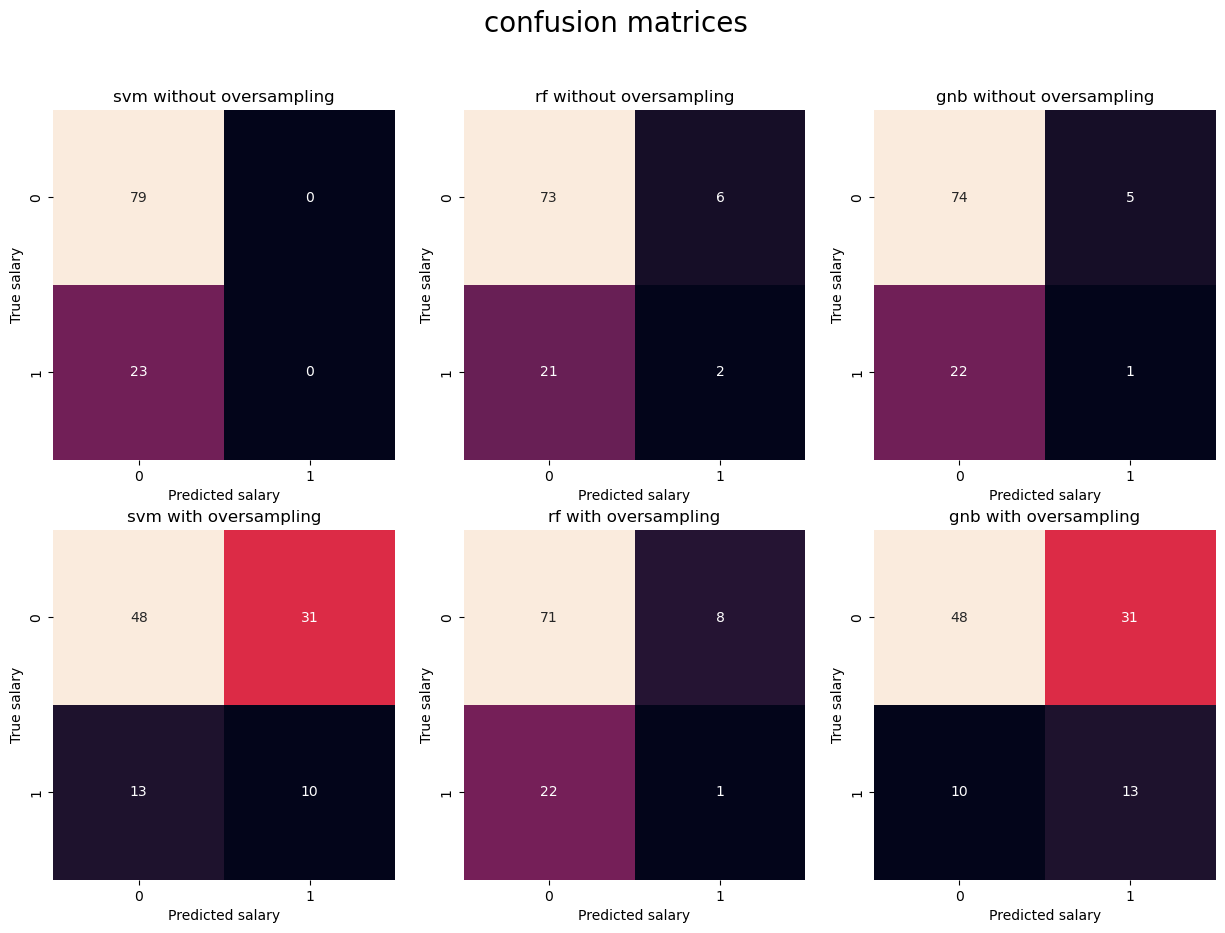

In [31]:
# Confusion matrix for all of the models
# Calculate confusion matrices
conf_matrices = {}
for predict in predicts:
    conf_matrices[predict[0]] = confusion_matrix(y_test, predict[2])
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Plot the matrices
for i in range(6):
    ax = axes[i % 2][i // 2]
    sns.heatmap(conf_matrices[predicts[i][0]], annot=True, fmt='d', cbar=False, ax=ax)
    ax.set_xlabel('Predicted salary')
    ax.set_ylabel('True salary')
    ax.set_title(predicts[i][0])
fig.suptitle('confusion matrices', fontsize = 20)
plt.show()

First let's consider the support vector machine trained on the data set without oversampling. <br> <br>
Despite having the highest accuracy on testing set (0.7745), SVM does not predict 1 at all. This is most likely because the dataset is highly imbalanced. <br> <br>
If we look at the confusion matrix of the SVM trained on the oversampled training set, we can clearly see that the model predict 1 much more frequently. It predict 1 correctly 10 times, while there are 23 high_salary = 1 in the test set. However, this method results in high false negative (out of 41 times it predict 1, only 10 of them are correct, while 31 of them are wrong). <br> <br> <br>
Let's now move on to the random forest classifier. <br> <br>
If we compare random forest classifier without oversampling to SVM and gnb without oversampling, random forest classifier is the best model in term of predicting 1 correctly. <br><br>
Surprisingly, using oversampled training set almost does not improve the random forest model at all. In fact, based on these confusion matrices, the one with oversampling seems to perform marginally worse than the one without oversampling. <br> <br><br>
Let's now discuss about gaussian naive baye classifier. <br> <br>
without the oversampling technique, the confusion matrix of the gnb similar to the rf model. <br>
With the oversampling technique, the confusion matrix of gnb is similar to SVM with oversampling but slightly better at predicting 1 correctly.

### Module 5: Summary
Summarize your findings and draw conclusions. Are there any interesting patterns that you would like to highlight?

Module 1: Some of the missing values are dropped. company_age missing values are replaced by median. The observations with extreme outliers are also dropped. At the end of the module, there are 366 rows left. <br> <br>

Module 2: In this data set hadoop and spark have relatively high correlation. there are some differences in distribution of rating for high salary and low salary jobs. Also, average salary of mle depends largely on seniority.<br><br>

Module 3: PCA is chosen as the dimension reduction technique. The first 35 components are used. <br><br>

Module 4: Every model has its own advantage and disadvantage. If we only care about accuracy, SVM model without oversampling has the highest accuracy. Moreover, even though oversampling can make the models predict 1 correctly more frequently, it overall leads to lower accuracy. Furthurmore, unexpectedly, random forest classifier's confusion matrix stays relatively the same for both oversampled training set and training set without oversampling. Finally, if we also care about predicting 1 correctly, gnb trained with oversampled training set may be the best choice out of these 3 models.